In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48175 entries, 0 to 48174
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  48175 non-null  float64
 1   etat                48175 non-null  object 
 2   genre               47965 non-null  object 
 3   lieu_naissance      46295 non-null  object 
 4   age                 48174 non-null  float64
 5   statut_matrimonial  48175 non-null  object 
 6   ville               48175 non-null  object 
 7   type                48175 non-null  object 
 8   profession          48172 non-null  object 
 9   secteur_activite    48175 non-null  object 
 10  anciennete          48172 non-null  float64
 11  revenu              48175 non-null  float64
 12  logement            48175 non-null  object 
 13  taux_interet        48175 non-null  float64
 14  assurance           48175 non-null  float64
 15  cout_global         48175 non-null  float64
 16  char

In [ ]:
df_train.describe()

,Id,age,anciennete,revenu,taux_interet,assurance,cout_global,charges
count,4.817500e+04,48174.000000,4.817200e+04,4.817500e+04,48175.000000,48175.000000,4.817500e+04,14465.000000
mean,2.060955e+06,38.941400,5.914298e+07,5.260143e+04,11.436407,239.379520,1.036877e+05,2246.233267
std,4.169091e+05,9.472511,6.585534e+09,1.007629e+05,2.536559,177.235483,8.096089e+04,5091.621249
min,6.570750e+05,18.000000,0.000000e+00,2.500000e+04,0.000000,30.210000,2.378880e+03,0.000000
25%,1.727200e+06,31.000000,6.000000e+01,3.845004e+04,10.900000,156.350000,6.499168e+04,0.000000
50%,2.056020e+06,38.000000,1.080000e+02,4.524550e+04,12.900000,203.550000,9.087816e+04,0.000000
75%,2.427188e+06,46.000000,1.680000e+02,5.633756e+04,12.900000,264.910000,1.184172e+05,3000.000000
max,2.827510e+06,70.000000,8.901730e+11,1.208081e+07,12.900000,4777.470000,1.745103e+06,158699.860000


In [ ]:
df_train.isnull().sum()


Id                        0
etat                      0
genre                   210
lieu_naissance         1880
age                       1
statut_matrimonial        0
ville                     0
type                      0
profession                3
secteur_activite          0
anciennete                3
revenu                    0
logement                  0
taux_interet              0
assurance                 0
cout_global               0
charges               33710
decision_finale           0
dtype: int64

In [ ]:
df_train.drop('lieu_naissance', inplace=True, axis=1)
df_test.drop('lieu_naissance', inplace=True, axis=1)

In [ ]:
df_train.drop(df_train[df_train['anciennete'] > 300].index, inplace = True)

In [ ]:
# Mean/meadian imputation
df_train['age'].fillna(df_train['age'].mean(), inplace=True)
df_train['anciennete'].fillna(df_train['anciennete'].median(), inplace=True)
df_test['age'].fillna(df_test['age'].mean(), inplace=True)
df_test['anciennete'].fillna(df_test['anciennete'].median(), inplace=True)

In [ ]:
df_train['charges'].describe()

count     44925.000000
mean       2159.289227
std        2750.112507
min           0.000000
25%        2159.289227
50%        2159.289227
75%        2159.289227
max      158699.860000
Name: charges, dtype: float64

In [ ]:
df_train['charges'].fillna(df_train['charges'].mean(), inplace=True)


In [ ]:
df_test['charges'].fillna(df_test['charges'].mean(), inplace=True)

In [ ]:
df_train['genre'].fillna("Homme",inplace=True)
df_test['genre'].fillna("Homme",inplace=True)


In [ ]:
df_test.isnull().sum()

Id                        0
etat                      0
genre                     0
age                       0
statut_matrimonial        0
ville                     0
type                      0
profession                0
secteur_activite          0
anciennete                0
revenu                    0
logement                  0
taux_interet              0
assurance                 0
cout_global               0
charges               16693
dtype: int64

In [ ]:
df_train['etat']=df_train['etat'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_train["etat"]=ProType.fit_transform(df_train["etat"])
df_train['etat']=df_train['etat'].astype('category')

df_train['genre']=df_train['genre'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_train["genre"]=ProType.fit_transform(df_train["genre"])
df_train['genre']=df_train['genre'].astype('category')

df_train['statut_matrimonial']=df_train['statut_matrimonial'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_train["statut_matrimonial"]=ProType.fit_transform(df_train["statut_matrimonial"])
df_train['statut_matrimonial']=df_train['statut_matrimonial'].astype('category')

df_train['ville']=df_train['ville'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_train["ville"]=ProType.fit_transform(df_train["ville"])
df_train['ville']=df_train['ville'].astype('category')

df_train['type']=df_train['type'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_train["type"]=ProType.fit_transform(df_train["type"])
df_train['type']=df_train['type'].astype('category')

df_train['profession']=df_train['profession'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_train["profession"]=ProType.fit_transform(df_train["profession"])
df_train['profession']=df_train['profession'].astype('category')

df_train['secteur_activite']=df_train['secteur_activite'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_train["secteur_activite"]=ProType.fit_transform(df_train["secteur_activite"])
df_train['secteur_activite']=df_train['secteur_activite'].astype('category')

df_train['logement']=df_train['logement'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_train["logement"]=ProType.fit_transform(df_train["logement"])
df_train['logement']=df_train['etat'].astype('category')


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48172 entries, 0 to 48174
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Id                  48172 non-null  float64 
 1   etat                48172 non-null  category
 2   genre               48172 non-null  category
 3   age                 48172 non-null  float64 
 4   statut_matrimonial  48172 non-null  category
 5   ville               48172 non-null  category
 6   type                48172 non-null  category
 7   profession          48172 non-null  category
 8   secteur_activite    48172 non-null  category
 9   anciennete          48172 non-null  float64 
 10  revenu              48172 non-null  float64 
 11  logement            48172 non-null  category
 12  taux_interet        48172 non-null  float64 
 13  assurance           48172 non-null  float64 
 14  cout_global         48172 non-null  float64 
 15  charges             48172 non-null  

In [ ]:
df_test['etat']=df_test['etat'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_test["etat"]=ProType.fit_transform(df_test["etat"])
df_test['etat']=df_test['etat'].astype('category')

df_test['genre']=df_test['genre'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_test["genre"]=ProType.fit_transform(df_test["genre"])
df_test['genre']=df_test['genre'].astype('category')

df_test['statut_matrimonial']=df_test['statut_matrimonial'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_test["statut_matrimonial"]=ProType.fit_transform(df_test["statut_matrimonial"])
df_test['statut_matrimonial']=df_test['statut_matrimonial'].astype('category')

df_test['ville']=df_test['ville'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_test["ville"]=ProType.fit_transform(df_test["ville"])
df_test['ville']=df_test['ville'].astype('category')

df_test['type']=df_test['type'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_test["type"]=ProType.fit_transform(df_test["type"])
df_test['type']=df_test['type'].astype('category')

df_test['profession']=df_test['profession'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_test["profession"]=ProType.fit_transform(df_test["profession"])
df_test['profession']=df_test['profession'].astype('category')

df_test['secteur_activite']=df_test['secteur_activite'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_test["secteur_activite"]=ProType.fit_transform(df_test["secteur_activite"])
df_test['secteur_activite']=df_test['secteur_activite'].astype('category')

df_test['logement']=df_test['logement'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df_test["logement"]=ProType.fit_transform(df_test["logement"])
df_test['logement']=df_test['etat'].astype('category')

In [ ]:
df_train.columns

Index(['Id', 'etat', 'genre', 'age', 'statut_matrimonial', 'ville', 'type',
       'profession', 'secteur_activite', 'anciennete', 'revenu', 'logement',
       'taux_interet', 'assurance', 'cout_global', 'charges',
       'decision_finale'],
      dtype='object')

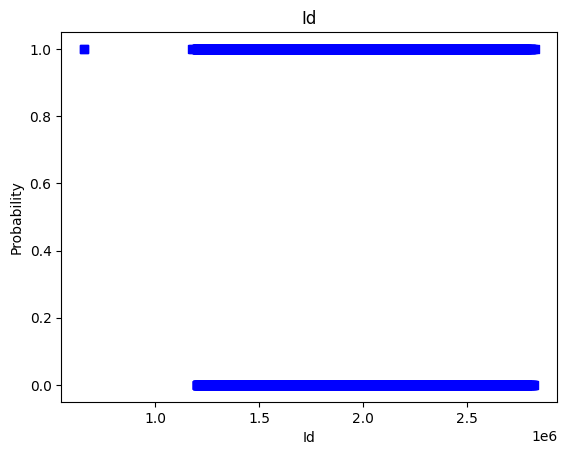

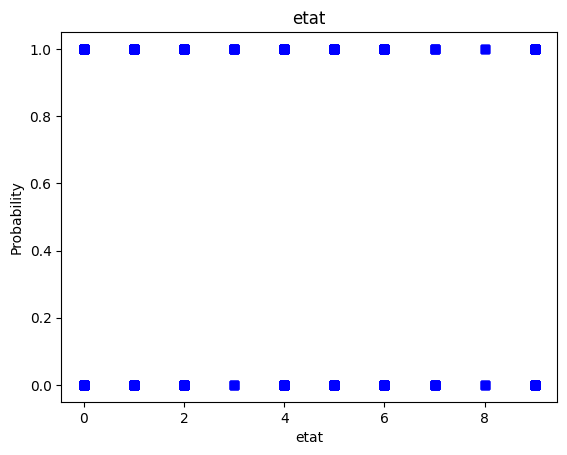

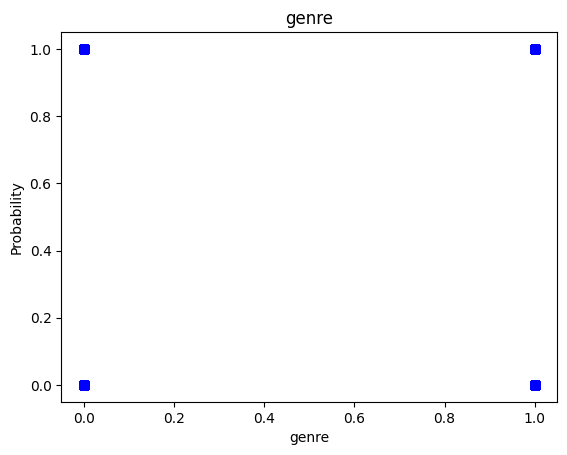

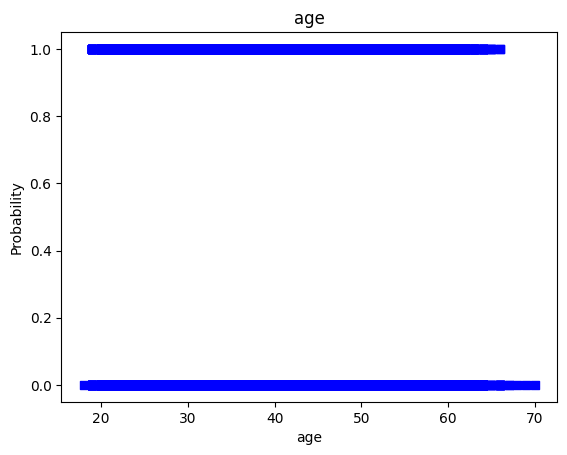

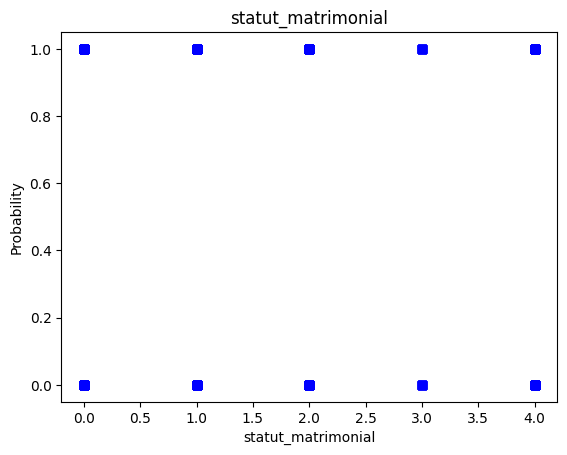

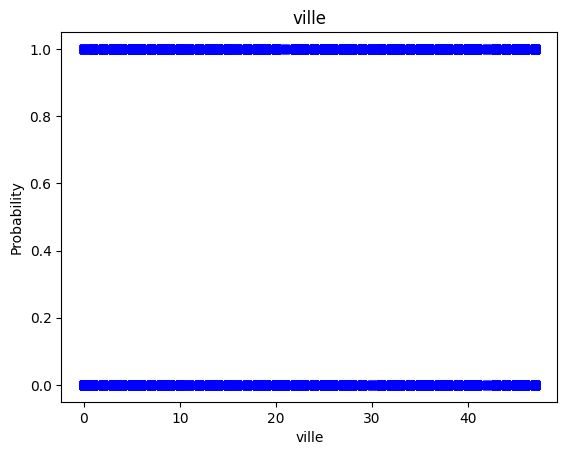

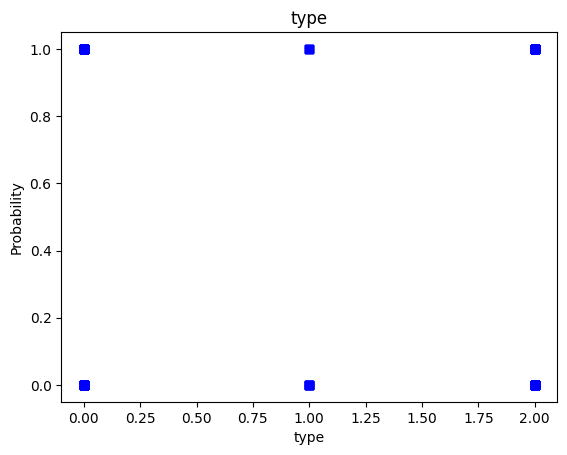

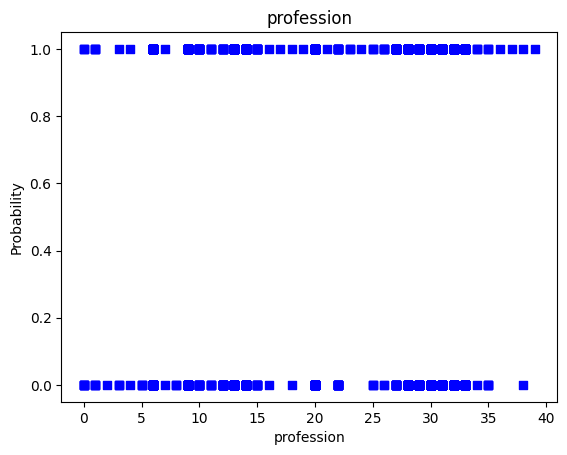

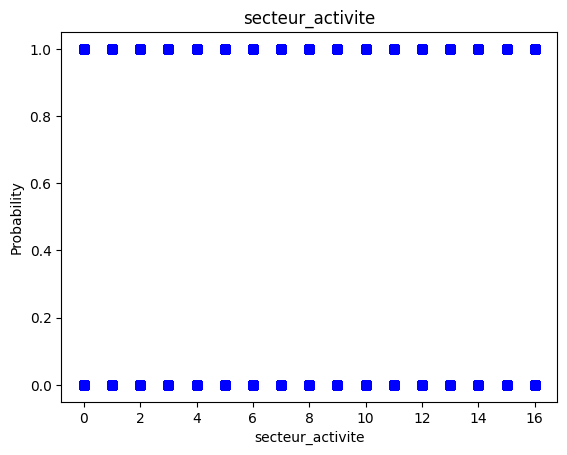

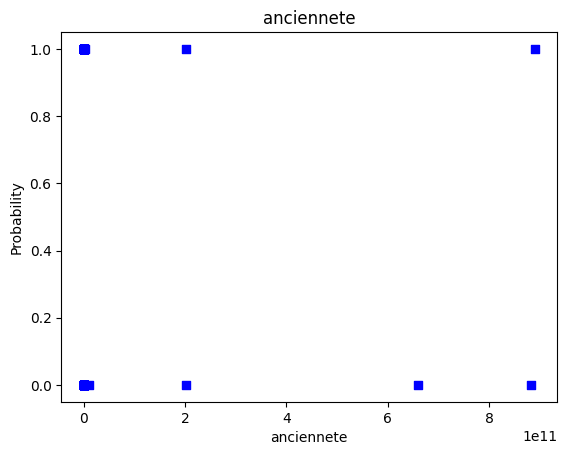

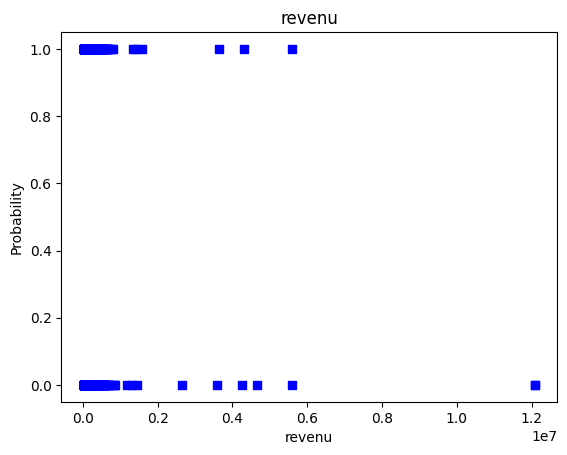

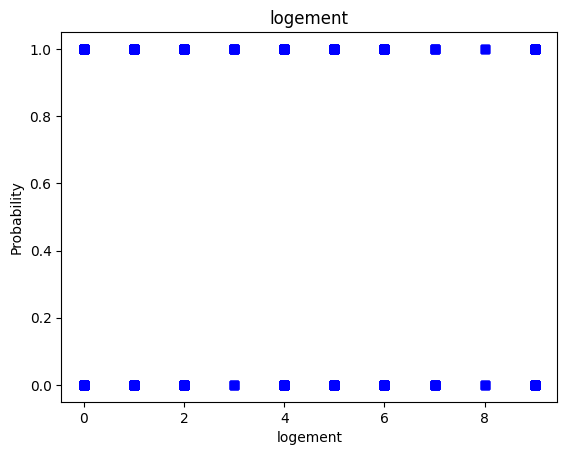

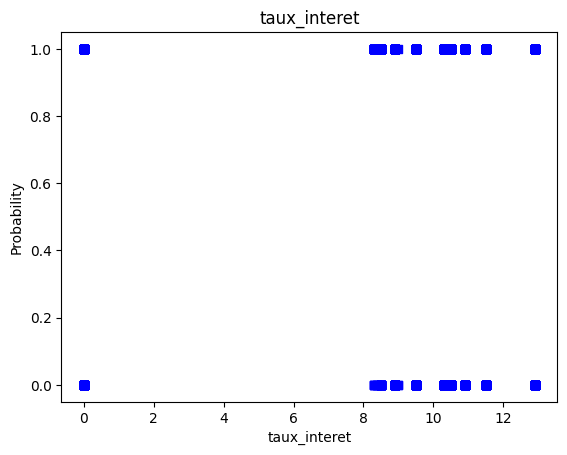

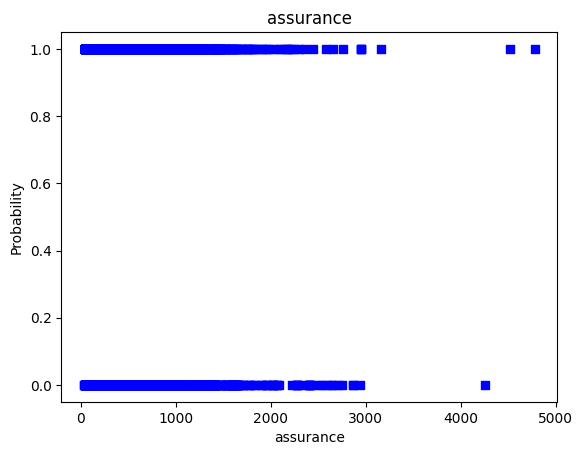

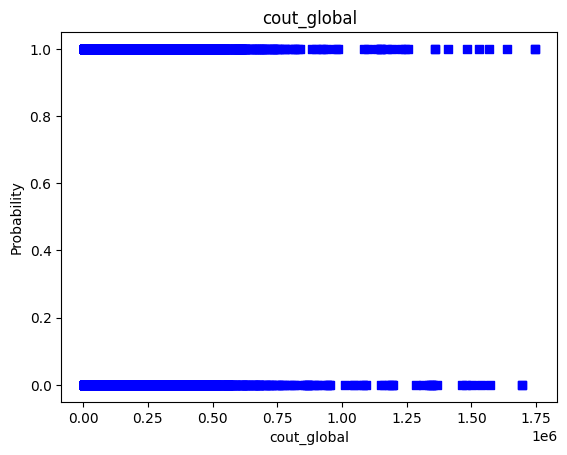

In [ ]:
y = df_train.iloc[:, -1]
cols=['Id', 'etat', 'genre', 'age', 'statut_matrimonial', 'ville', 'type',
       'profession', 'secteur_activite', 'anciennete', 'revenu', 'logement',
       'taux_interet', 'assurance', 'cout_global', 'charges']
for label in cols[:-1]:
    plt.scatter(df_train[label], y, c = "blue", marker = "s")
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.show()

In [ ]:
label_dictionary = {
    "Refusé":0,
    "Accepté":1,
}
df_train['decision_finale']= df_train['decision_finale'].map(label_dictionary)


In [ ]:
df_train['decision_finale'].value_counts()

0    23827
1    21098
Name: decision_finale, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler


X_train = df_train.drop('decision_finale', axis=1)
y_train = df_train['decision_finale']

X_test = df_test

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#data test prep
x_test_np=X_test.values
x_test_np

array([[2.41002000e+06, 0.00000000e+00, 1.00000000e+00, ...,
        1.47500000e+02, 6.88473200e+04, 0.00000000e+00],
       [2.15475000e+06, 0.00000000e+00, 0.00000000e+00, ...,
        1.65200000e+02, 6.54432400e+04, 2.23188918e+03],
       [2.37864500e+06, 9.00000000e+00, 1.00000000e+00, ...,
        4.13000000e+02, 1.63603640e+05, 2.23188918e+03],
       ...,
       [1.49459500e+06, 4.00000000e+00, 1.00000000e+00, ...,
        2.12400000e+02, 8.41388400e+04, 0.00000000e+00],
       [2.15029000e+06, 0.00000000e+00, 0.00000000e+00, ...,
        1.66970000e+02, 7.79349200e+04, 0.00000000e+00],
       [1.80642500e+06, 4.00000000e+00, 1.00000000e+00, ...,
        1.77000000e+02, 7.01160000e+04, 0.00000000e+00]])

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train_scaled, y_train)
scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
mean_accuracy = scores.mean()

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.7577963272120201


In [ ]:
y_predictions = knn.predict(x_test_np)
nv=pd.DataFrame(df_test["Id"])
nv["df"]=pd.DataFrame(y_predictions)
nv.columns=['Id_pret','decision_finale']
nv.to_csv("knn.csv", index=False)


# **Logistic Reg**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)
scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
mean_accuracy = scores.mean()

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.7804327262067756


In [ ]:
y_predictions = logreg.predict(x_test_np)
nv=pd.DataFrame(df_test["Id"])
nv["df"]=pd.DataFrame(y_predictions)
nv.columns=['Id_pret','decision_finale']
nv.to_csv("logreg.csv", index=False)


## **xGBOOST**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(
    max_depth=3,
    learning_rate=0.01,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8
)
xgb_model.fit(Xtrain, ytrain)
y_pred = xgb_model.predict(Xtest)
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7968863518422419
Precision: 0.7883865044755566
Recall: 0.7684563758389261
F1-Score: 0.7782938710773761


In [ ]:
y_predictions = xgb_model.predict(x_test_np)
nv=pd.DataFrame(df_test["Id"])
nv["df"]=pd.DataFrame(y_predictions)
nv.columns=['Id_pret','decision_finale']
nv.to_csv("xgb.csv", index=False)


## **catboost**

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.1 MB/s eta 0:00:00


In [ ]:
import catboost as cb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
catboost_model = cb.CatBoostClassifier( iterations=1000, learning_rate=0.01, depth=6, l2_leaf_reg=3, random_seed=42 )

catboost_model.fit(Xtrain, ytrain)
y_pred = catboost_model.predict(Xtest)

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


0:	learn: 0.6891357	total: 82ms	remaining: 1m 21s
1:	learn: 0.6851529	total: 103ms	remaining: 51.5s
2:	learn: 0.6813346	total: 118ms	remaining: 39.4s
3:	learn: 0.6775749	total: 135ms	remaining: 33.7s
4:	learn: 0.6739531	total: 162ms	remaining: 32.2s
5:	learn: 0.6704440	total: 191ms	remaining: 31.7s
6:	learn: 0.6669128	total: 220ms	remaining: 31.3s
7:	learn: 0.6634336	total: 257ms	remaining: 31.9s
8:	learn: 0.6600162	total: 296ms	remaining: 32.6s
9:	learn: 0.6566958	total: 339ms	remaining: 33.5s
10:	learn: 0.6534346	total: 378ms	remaining: 34s
11:	learn: 0.6502448	total: 410ms	remaining: 33.7s
12:	learn: 0.6471390	total: 517ms	remaining: 39.3s
13:	learn: 0.6441362	total: 570ms	remaining: 40.1s
14:	learn: 0.6411812	total: 644ms	remaining: 42.3s
15:	learn: 0.6383810	total: 681ms	remaining: 41.9s
16:	learn: 0.6355384	total: 729ms	remaining: 42.1s
17:	learn: 0.6327676	total: 768ms	remaining: 41.9s
18:	learn: 0.6300691	total: 819ms	remaining: 42.3s
19:	learn: 0.6273719	total: 864ms	remaining

In [ ]:
y_predictions = catboost_model.predict(x_test_np)
nv=pd.DataFrame(df_test["Id"])
nv["df"]=pd.DataFrame(y_predictions)
nv.columns=['Id_pret','decision_finale']
nv.to_csv("catboost.csv", index=False)


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf_model.fit(Xtrain, ytrain)
y_pred2 = rf_model.predict(Xtest)
accuracy = accuracy_score(ytest, y_pred2)
precision = precision_score(ytest, y_pred2)
recall = recall_score(ytest, y_pred2)
f1 = f1_score(ytest, y_pred2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


In [ ]:
y_predictions = rf_model.predict(x_test_np)
nv=pd.DataFrame(df_test["Id"])
nv["df"]=pd.DataFrame(y_predictions)
nv.columns=['Id_pret','decision_finale']
nv.to_csv("rf.csv", index=False)
